In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *


In [2]:
def get_folder_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            # Skip if it is symbolic link
            if not os.path.islink(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

In [3]:
sigma_sfr = 0.000398107/yr_to_sec 

In [ ]:
kk = 0 


data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', 'SetonixData/SN1a')
# data_path = os.path.join('/scratch/jh2/av5889/sims/SetonixRuns/SN1a/')

os.chdir(data_path)
list_file = glob.glob("proj_y_plt*/")
Zunit = Msun/1.e3
infile   = os.path.join(data_path, 'metal_uniform.in')

dom_min, dom_max, ncells = getdomain(infile)
fac = 1
zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
dy = (dom_max[1]- dom_min[1])/(fac*int(ncells[1]))
dz = (dom_max[2]- dom_min[2])/(fac*int(ncells[2]))

dom_min = [0.0, -1.2072e+22, 0.0] 

timestep = np.zeros(len(list_file))

tot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
wtot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
htot_mass_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))

tot_scal_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
wtot_scal_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
htot_scal_flux = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))

tot_scal_flux1 = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
wtot_scal_flux1 = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
htot_scal_flux1 = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))

tot_scal_flux2 = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
wtot_scal_flux2 = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))
htot_scal_flux2 = np.zeros((len(list_file),xrange.shape[0], zrange.shape[0]))


tot_scal = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
tot_rho = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
tot_scal1 = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
tot_scal2 = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))


dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))


max_time=0.0
i=0
tot_mass_flux = []
timestep = []
for i in range(len(list_file)):
    f = list_file[i]
    inputfile = os.path.join(data_path, f)

    
    file_size = get_folder_size(inputfile) / (1024 * 1024)
        
    if(file_size<1.):
        print('Skipping ', inputfile, '\n')
        continue
        
    ds   = yt.load(inputfile)
    data = ds.covering_grid(level=0, left_edge=dom_min,  dims=ds.domain_dimensions, num_ghost_zones=0)
    print(inputfile)
    curr_timestep = ds.current_time.to('Myr')
    curr_timestep = 10.
    if(curr_timestep>0.0):
        timestep.append(ds.current_time.to('Myr'))

        tot_mass_flux.append(np.array(data['mass_outflow'])[:,0,:]*dx*yr_to_sec/Msun)
        
        wtot_mass_flux[i,:] = np.array(data['warm_mass_outflow'])[:,0,:]*dx*yr_to_sec/Msun
        htot_mass_flux[i,:] = np.array(data['hot_mass_outflow'])[:,0,:]*dx*yr_to_sec/Msun

        tot_scal_flux[i,:] = np.array(data['scalar0_outflow'])[:,0,:]*dx
        wtot_scal_flux[i,:] = np.array(data['warm_scalar0_outflow'])[:,0,:]*dx
        htot_scal_flux[i,:] = np.array(data['hot_scalar0_outflow'])[:,0,:]*dx

        tot_scal_flux1[i,:] = np.array(data['scalar1_outflow'])[:,0,:]*dx
        wtot_scal_flux1[i,:] = np.array(data['warm_scalar1_outflow'])[:,0,:]*dx
        htot_scal_flux1[i,:] = np.array(data['hot_scalar1_outflow'])[:,0,:]*dx

        tot_scal[i,:] = np.array(data['scalar0'])[:,0,:]*Zunit
        tot_scal1[i,:] = np.array(data['scalar1'])[:,0,:]*Zunit
        tot_scal2[i,:] = np.array(data['scalar2'])[:,0,:]*Zunit 
        tot_rho[i,:] = np.array(data['rho'])[:,0,:]
        i+=1
    
# Zinj = scalar_mass/ rho
tot_mass_flux = np.asarray(tot_mass_flux)
timestep = np.asarray(timestep)

# < Z_Ia >_{z < 500 pc} vs time and < Z_II >_{z < 500 pc} vs time

In [ ]:
#num = \int_{-z}^{z} \int \int rhoZ dxdydz
#denom = \int_{-z}^{z} \int \int rho dxdydz


X,  Z = np.meshgrid(xrange, zrange)
Volmask = (np.abs(Z)<1.*kpc)
Z_Ia = np.zeros(timestep.shape[0])
Z_II = np.zeros(timestep.shape[0])
Z_AGB = np.zeros(timestep.shape[0])
metmass_II = np.zeros(timestep.shape[0])
metmass_Ia = np.zeros(timestep.shape[0])
metmass_AGB = np.zeros(timestep.shape[0])

for i in range(timestep.shape[0]):
    
    numer_0 = np.sum(np.ma.array(tot_scal[i], mask=~Volmask), axis=(0,1)) 
    numer_1 = np.sum(np.ma.array(tot_scal1[i], mask=~Volmask), axis=(0,1)) 
    numer_2 = np.sum(np.ma.array(tot_scal2[i], mask=~Volmask), axis=(0,1)) 
    denom = np.sum(np.ma.array(tot_rho[i], mask=~Volmask), axis=(0,1)) 
    
    Z_II[i] = numer_0 /denom    
    Z_Ia[i] = numer_1 /denom    
    Z_AGB[i] = numer_2 /denom
    if(denom==0.0):
        print(i, timestep[i])
    
    metmass_II[i] = np.sum(tot_scal[i], axis=(0,1)) * dx * dz
    metmass_Ia[i] = np.sum(tot_scal1[i], axis=(0,1)) * dx * dz
    metmass_AGB[i] = np.sum(tot_scal2[i], axis=(0,1)) * dx * dz


In [ ]:
Zoxy = 8.6e-3


indexes = list(range(len(timestep)))
indexes.sort(key=timestep.__getitem__)
sorted_time = np.asarray(list(map(timestep.__getitem__, indexes)))
sorted_ZII  = np.asarray(list(map(Z_II.__getitem__, indexes)))
sorted_ZIa  = np.asarray(list(map(Z_Ia.__getitem__, indexes)))
sorted_ZABG  = np.asarray(list(map(Z_AGB.__getitem__, indexes)))

plt.figure(figsize=(8,6))
plt.plot(sorted_time, sorted_ZII,  label='Type II', lw=3.0)
mask= (sorted_ZIa>0.0)
plt.plot(sorted_time[mask], sorted_ZIa[mask],  label='Type Ia', lw=3.0)
# mask= (sorted_ZIa>0.0)
plt.plot(sorted_time, sorted_ZABG,   label='AGB', lw=3.0)

plt.legend()
plt.title(r'$|z|<1$ kpc')
plt.xlabel('Time [Myr]')
plt.ylabel(r'$\rho_Z/\rho$')
plt.yscale('log')
# plt.ylim(1.e-5, 5.e-2)

In [ ]:
Zoxy = 8.6e-3


# indexes = list(range(len(timestep)))
# indexes.sort(key=timestep.__getitem__)
# sorted_time = np.asarray(list(map(timestep.__getitem__, indexes)))
sorted_ZII  = np.asarray(list(map(Z_II.__getitem__, indexes)))
sorted_ZIa  = np.asarray(list(map(Z_Ia.__getitem__, indexes)))
sorted_ZAGB  = np.asarray(list(map(Z_AGB.__getitem__, indexes)))

mask= (sorted_ZIa>0.0)

plt.figure(figsize=(8,6))
# plt.plot(sorted_time, sorted_ZII,  label='Type II', lw=3.0)
plt.plot(sorted_time[mask], sorted_ZII[mask]/sorted_ZIa[mask],  label='Type II/Type Ia', lw=3.0)
# plt.plot(sorted_time[mask], sorted_ZII[mask]/sorted_ZAGB[mask],  label='Type II/AGB', lw=3.0)
plt.legend()
plt.title(r'$|z|<1$ kpc')
plt.xlabel('Time [Myr]')
plt.ylabel(r'$\langle Z \rangle_{\rm II}/\langle Z \rangle_{\rm Ia}$')

In [ ]:
deltaT = (2.16766603e+15-7.400353225e+14 )
deltaT = 7.400353225e+14
AGB = deltaT * 16. * sigma_sfr  
103255, AGB, np.sqrt(AGB)

In [ ]:
### Total metal mass/ (dMetall/dt * t) vs time
Zoxy = 8.6e-3

indexes = list(range(len(timestep)))
indexes.sort(key=timestep.__getitem__)

sorted_time = np.asarray(list(map(timestep.__getitem__, indexes)))
sorted_metmassII  = np.asarray(list(map(metmass_II.__getitem__, indexes)))
sorted_metmassIa  = np.asarray(list(map(metmass_Ia.__getitem__, indexes)))
sorted_metmassABG  = np.asarray(list(map(metmass_AGB.__getitem__, indexes)))

met_injII = 0.6 * sigma_sfr * Msun * sorted_time * Myr 
met_injIa = 0.4 * sigma_sfr * Msun * sorted_time * Myr 
met_AGB = 16. * sigma_sfr * Msun * sorted_time * Myr 

mask = (sorted_metmassIa>0.0)



plt.figure(figsize=(8,6))
plt.plot(sorted_time, sorted_metmassII/met_injII,  label='Type II', lw=3.0)
plt.plot(sorted_time, sorted_metmassIa/met_injIa,  label='Type Ia', lw=3.0)
plt.plot(sorted_time,  sorted_metmassABG/met_AGB,  label='AGB', lw=3.0)
# plt.plot(sorted_time, met_AGB,  label='th', lw=3.0)
plt.yscale('log')
plt.legend()

plt.xlabel('Time [Myr]')
plt.ylabel(r'$M_Z/M_{\rm Z,inj}$')
plt.xlim(-0.1, 5.)
plt.ylim(0.0, 2.0)


In [ ]:
### Total metal mass/ (dMetall/dt * t) vs time
met_AGB =  16. * sigma_sfr * Msun * sorted_time * Myr 

plt.plot(sorted_time, met_AGB,  label='th', lw=3.0)
# plt.fill_between(sorted_time, 1.5*met_AGB, 0.7*met_AGB, alpha=0.2,lw=3.0)
plt.plot(sorted_time, sorted_metmassABG,  label='AGB', lw=3.0)
plt.yscale('log')
plt.legend()

plt.xlabel('Time [Myr]')
plt.ylabel(r'$M$')
plt.xlim(-0.1, 50.)
# plt.ylim(1.e37, 1.e39)


# Load Slices

In [4]:
# data_path = '/scratch/jh2/av5889/sims/SNIa/PoissonTest/'
data_path = '/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/PoissonTest/'

In [5]:
# f = 'proj_y_plt50000/'
f = 'plt00500/'
inputfile = os.path.join(data_path, f)
ds   = yt.load(inputfile)
ds.current_time.to('Myr')

yt : [INFO     ] 2025-01-17 15:07:28,328 Parameters: current_time              = 3328738124800.9785
yt : [INFO     ] 2025-01-17 15:07:28,330 Parameters: domain_dimensions         = [ 512  512 4096]
yt : [INFO     ] 2025-01-17 15:07:28,332 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2025-01-17 15:07:28,333 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


unyt_quantity(0.10548135, 'Myr')

In [6]:
infile   = os.path.join(data_path, 'metal_uniform.in')

dom_min, dom_max, ncells = getdomain(infile)
fac = 1
zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
dy = (dom_max[1]- dom_min[1])/(fac*int(ncells[1]))
dz = (dom_max[2]- dom_min[2])/(fac*int(ncells[2]))


In [7]:
lev = 0
data = ds.covering_grid(level=lev, left_edge=dom_min, dims=ds.domain_dimensions * fac, num_ghost_zones=0)
timestep = ds.current_time.to('Myr')

rho = np.array(data['gasDensity'])
rhoZ0 = np.array(data['scalar_0'])
rhoZ1 = np.array(data['scalar_1'])
rhoZ2 = np.array(data['scalar_2'])
# np.amin(eint)

In [8]:
num_Ia = 0.4 * sigma_sfr * timestep.value * Myr
tIa_scal = num_Ia * Msun
tIa_scal_dat = np.sum(rhoZ1)*Msun*dx*dz*dy/1.e3
tIa_scal_dat/tIa_scal, num_Ia

(1.5662834079344554, 16.797144886178202)

In [9]:
num_II = 0.6 * sigma_sfr * timestep.value * Myr
tII_scal = num_II * Msun
tII_scal_dat = np.sum(rhoZ0)*Msun*dx*dz*dy/1.e3
tII_scal_dat/tII_scal

1.2029460776922742

In [10]:
num_agb = 16 * sigma_sfr * timestep.value * Myr
# num_agb = 5701
agb_scal = num_agb * Msun
agb_scal_dat = np.sum(rhoZ2)*Msun*dx*dz*dy/1.e3
agb_scal_dat/agb_scal, num_agb

(1.0095600977596824, 671.8857954471281)

In [ ]:
fig, ax = plt.subplots(1, 4, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(24, 24))
i=0

cbarx = 0.13
cbheight = 0.02
cbary = 0.89
cblen = 0.15
dx1 = 0.2
cbtitlex = 0.1
cbtitley = 16.5

Zunit = Msun/1.e3
Z0 = rhoZ0[:,0,:] #* Zunit/rho[:,0,:]
Z1 = rhoZ1[:,0,:] #* Zunit/rho[:,0,:]
Z2 = rhoZ2[:,0,:] #* Zunit/rho[:,0,:]

plot = ax[0].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(Z0),\
                    norm=mcolors.LogNorm(vmin=1.e-65, vmax=1.e-56),
                    cmap='Blues')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-3,  1.e-1, 1.e1, 1.e3))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $Z_{\rm type II}$" )


plot = ax[1].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(Z1),\
                    norm=mcolors.LogNorm(vmin=1.e-65, vmax=1.e-56),
                    cmap='Blues')
cax = fig.add_axes([cbarx + dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-3,  1.e-1, 1.e1, 1.e3))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $Z_{\rm type Ia}$")

plot = ax[2].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(Z2),\
                    norm=mcolors.LogNorm(vmin=1.e-65, vmax=1.e-56),
                    cmap='Blues')
cax = fig.add_axes([cbarx + 2.*dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-3,  1.e-1, 1.e1, 1.e3))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $Z_{\rm AGB}$" )


plot = ax[3].pcolormesh(yrange/kpc,zrange/kpc, np.transpose(rho[:,0,:])/mp,\
                    norm=mcolors.LogNorm(vmin=1.e-8, vmax=1.e-2),
                    cmap='Spectral')
cax = fig.add_axes([cbarx + 3.*dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-8,  1.e-6, 1.e-4, 1.e-2))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\rho$" )



ax[1].tick_params(axis='y', labelleft=False, labelright=False, right=True, left=True)
ax[2].tick_params(axis='y', labelleft=False, labelright=False, right=True, left=True)
plt.setp(ax, 'ylim', (-0.1, 4.))

In [76]:
data_path = '/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/SN1a/PoissonTest/'
filename = os.path.join(data_path, 'output_100_4nodes_4pc_SN.log')
file = open(filename)
lines = file.readlines()

In [77]:
total_count = []
for line in lines:
    if(len(line.split())>4):
        if(line.split()[1]=='AGB'):
#             print(line)
            total_count.append(int(line.split()[4]))
total_count = np.asarray(total_count)
np.sum(total_count)

1548

In [78]:
num_agb = 16 * sigma_sfr * 3.363614889e+12 
num_agb

680.1669245029196

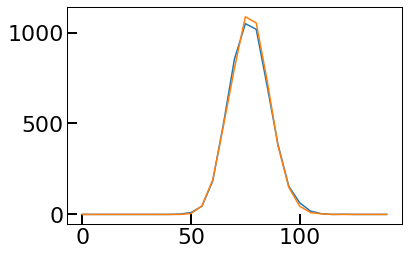

In [30]:

arr2 = np.random.poisson(79, size =5000)
arr22, bins2 = np.histogram(arr2, bins=bins)

plt.plot(bins1[:-1], arr)
plt.plot(bins2[:-1], arr22)

In [ ]:
dt =  1.6557095949e+10
expectation_valueAGB = (1.3857971188361884e-54*16.0) * kpc*kpc * dt
expectation_valueAGB

In [ ]:
expectation_valueIa = (1.3857971188361884e-54*0.4) * kpc*kpc * dt
expectation_valueIa

In [ ]:
arr = np.random.poisson(expectation_valueAGB, 5000)
hist, bins = np.histogram(arr)

In [ ]:
arr1 = np.random.poisson(1, 10000)
hist1, bins1 = np.histogram(arr1)

In [ ]:
plt.plot(bins[:-1], hist)
plt.plot(bins1[:-1], hist1)